# Sentinel-3
Let's use EOReader to open and read some Sentinel-3 bands and see the specificities of OLCI and SLSTR constellations.

In [1]:
# Imports
import os

# EOReader
from eoreader.reader import Reader
from eoreader.bands import YELLOW, Oa21, RED, SWIR_2, F1

# Declare the reader (only once)
reader = Reader()

In [2]:
# Create logger
import logging
from sertit import logs

logger = logging.getLogger("eoreader")
logs.init_logger(logger)

## Sentinel-3 OLCI

In [3]:
# First of all, let's focus on Sentinel-3 OLCI data
olci_path = os.path.join(
    "/home", "prods", "S3",
    "S3A_OL_1_EFR____20191215T105023_20191215T105323_20191216T153115_0179_052_322_2160_LN1_O_NT_002.zip"
)
olci_prod = reader.open(olci_path, remove_tmp=True)
olci_prod

eoreader.S3OlciProduct 'S3A_OL_1_EFR____20191215T105023_20191215T105323_20191216T153115_0179_052_322_2160_LN1_O_NT_002'
Attributes:
	condensed_name: 20191215T105023_S3_OLCI_EFR
	path: /home/prods/S3/S3A_OL_1_EFR____20191215T105023_20191215T105323_20191216T153115_0179_052_322_2160_LN1_O_NT_002.zip
	constellation: Sentinel-3 OLCI
	sensor type: Optical
	product type: OL_1_EFR___
	default pixel size: 300.0
	default resolution: 300.0
	acquisition datetime: 2019-12-15T10:50:23.000506
	band mapping:
		COASTAL_AEROSOL: 3
		BLUE: 4
		DEEP_BLUE: 2
		GREEN: 6
		YELLOW: 7
		RED: 8
		VEGETATION_RED_EDGE_1: 11
		VEGETATION_RED_EDGE_2: 12
		VEGETATION_RED_EDGE_3: 16
		NIR: 17
		NARROW_NIR: 17
		WATER_VAPOUR: 20
		Oa01: 1
		Oa09: 9
		Oa10: 10
		Oa13: 13
		Oa14: 14
		Oa15: 15
		Oa18: 18
		Oa19: 19
		Oa21: 21
		GREEN_I: 5
	needs extraction: False

In [4]:
# Get the bands information
olci_prod.bands

eoreader.SpectralBand 'Oa01'
Attributes:
	id: 1
	eoreader_name: Oa01
	common_name: 
	gsd (m): 300.0
	asset_role: reflectance
	Center wavelength (nm): 400.0
	Bandwidth (nm): 15.0
	description: Aerosol correction, improved water constituent retrieval
eoreader.SpectralBand 'Oa02'
Attributes:
	id: 2
	eoreader_name: DEEP_BLUE
	common_name: 
	gsd (m): 300.0
	asset_role: reflectance
	Center wavelength (nm): 412.5
	Bandwidth (nm): 10.0
	description: Yellow substance and detrital pigments (turbidity)
eoreader.SpectralBand 'Oa03'
Attributes:
	id: 3
	eoreader_name: COASTAL_AEROSOL
	common_name: coastal
	gsd (m): 300.0
	asset_role: reflectance
	Center wavelength (nm): 442.5
	Bandwidth (nm): 10.0
	description: Chlorophyll absorption maximum, biogeochemistry, vegetation
eoreader.SpectralBand 'Oa04'
Attributes:
	id: 4
	eoreader_name: BLUE
	common_name: blue
	gsd (m): 300.0
	asset_role: reflectance
	Center wavelength (nm): 490.0
	Bandwidth (nm): 10.0
	description: High Chlorophyll
eoreader.SpectralBan

⚠️ Note that mapped bands need to be called by their mapped name and the specific ones with their true Sentinel-3 names

In [5]:
# Load the Yellow band and the far NIR one
olci_bands = olci_prod.load([YELLOW, Oa21])

2025-12-23 10:50:54,139 - [DEBUG] - Loading bands ['YELLOW', 'Oa21']
2025-12-23 10:50:54,643 - [DEBUG] - Converting YELLOW to reflectance
/opt/conda/lib/python3.11/site-packages/rasterio/__init__.py:366: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
/opt/conda/lib/python3.11/site-packages/xarray/namedarray/core.py:264: UserWarning: Duplicate dimension names present: dimensions {'bands'} appear more than once in dims=('bands', 'bands'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  self._d

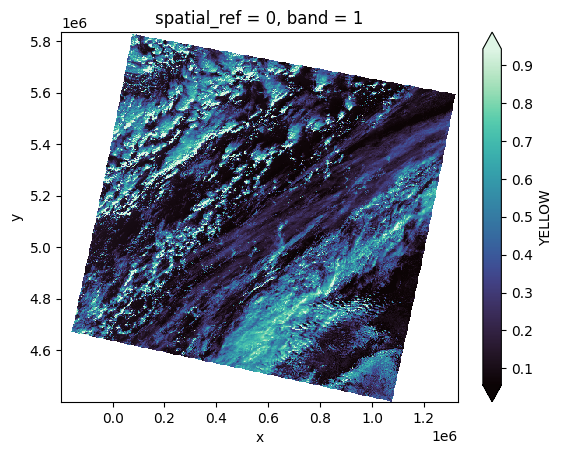

In [6]:
# Plot a subsampled version
olci_bands[YELLOW][:, ::10, ::10].plot(robust=True, cmap="mako")

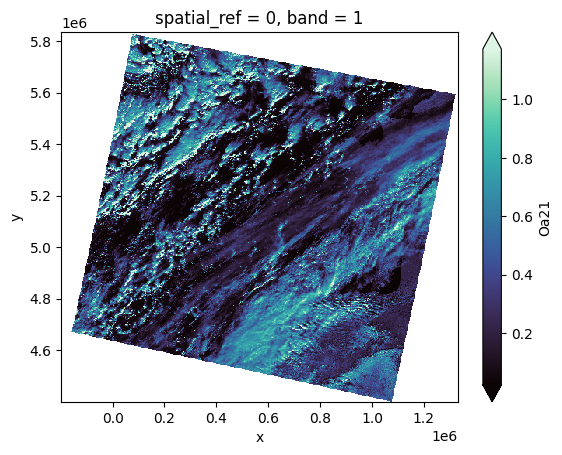

In [7]:
olci_bands[Oa21][:, ::10, ::10].plot(robust=True, cmap="mako")

## Sentinel-3 SLSTR

In [8]:
# Other SLSTR imports
from eoreader.keywords import SLSTR_VIEW, SLSTR_STRIPE, SLSTR_RAD_ADJUST
from eoreader.products import SlstrRadAdjustTuple, SlstrRadAdjust, SlstrView, SlstrStripe

# Then, let's focus on Sentinel-3 SLSTR data (extracted here, but a zip would work)
slstr_path = os.path.join(
    "/home", "prods", "S3",
    "S3B_SL_1_RBT____20191115T233722_20191115T234022_20191117T031722_0179_032_144_3420_LN2_O_NT_003.SEN3"
)
slstr_prod = reader.open(slstr_path, remove_tmp=True)
slstr_prod

eoreader.S3SlstrProduct 'S3B_SL_1_RBT____20191115T233722_20191115T234022_20191117T031722_0179_032_144_3420_LN2_O_NT_003'
Attributes:
	condensed_name: 20191115T233722_S3_SLSTR_RBT
	path: /home/prods/S3/S3B_SL_1_RBT____20191115T233722_20191115T234022_20191117T031722_0179_032_144_3420_LN2_O_NT_003.SEN3
	constellation: Sentinel-3 SLSTR
	sensor type: Optical
	product type: SL_1_RBT___
	default pixel size: 500.0
	default resolution: 500.0
	acquisition datetime: 2019-11-15T23:37:22.254773
	band mapping:
		GREEN: S1
		RED: S2
		NIR: S3
		NARROW_NIR: S3
		SWIR_CIRRUS: S4
		SWIR_1: S5
		SWIR_2: S6
		THERMAL_IR_1: S8
		THERMAL_IR_2: S9
		S7: S7
		F1: F1
		F2: F2
	needs extraction: False

In [9]:
# Get the bands information
slstr_prod.bands

eoreader.SpectralBand 'F1'
Attributes:
	id: F1
	eoreader_name: F1
	common_name: 
	gsd (m): 1000.0
	asset_role: brightness_temperature
	Center wavelength (nm): 3742.0
	Bandwidth (nm): 398.0
	description: Active fire, brightness temperature, 1km
eoreader.SpectralBand 'F2'
Attributes:
	id: F2
	eoreader_name: F2
	common_name: 
	gsd (m): 1000.0
	asset_role: brightness_temperature
	Center wavelength (nm): 10854.0
	Bandwidth (nm): 776.0
	description: Active fire, brightness temperature, 1km
eoreader.SpectralBand 'S1'
Attributes:
	id: S1
	eoreader_name: GREEN
	common_name: green
	gsd (m): 500.0
	asset_role: reflectance
	Center wavelength (nm): 554.2700000000001
	Bandwidth (nm): 19.259999999999998
	description: Cloud screening, vegetation monitoring, aerosol
eoreader.SpectralBand 'S2'
Attributes:
	id: S2
	eoreader_name: RED
	common_name: red
	gsd (m): 500.0
	asset_role: reflectance
	Center wavelength (nm): 659.47
	Bandwidth (nm): 19.25
	description: NDVI, vegetation monitoring, aerosol
eoreader

⚠️Same remarks than above about mapped and specific band names apply.

⚠️Note that native radiance bands are converted into reflectance, whereas brightness temperature bands are not.

In [10]:
# Load bands with nadir view and stripe B
# (for bands that have a stripe B, the other will load their unique stripe, namely A or I)
# RED: only stripe A
# SWIR_2: has strip 1, B and TDI (c)
# F1: has only stripe I
slstr_bn_bands = slstr_prod.load([RED, SWIR_2, F1], slstr_view="n", slstr_stripe="b")
slstr_bn_bands_2 = slstr_prod.load([RED, SWIR_2, F1], **{SLSTR_VIEW: SlstrView.NADIR, SLSTR_STRIPE: SlstrStripe.B})

2025-12-23 10:51:21,646 - [DEBUG] - Loading bands ['RED', 'SWIR_2', 'F1']
2025-12-23 10:51:21,967 - [DEBUG] - Converting RED to reflectance
2025-12-23 10:51:26,359 - [DEBUG] - Geocoding RED
2025-12-23 10:51:31,783 - [DEBUG] - Converting SWIR_2 to reflectance
2025-12-23 10:51:36,154 - [DEBUG] - Geocoding SWIR_2
2025-12-23 10:51:41,323 - [DEBUG] - Geocoding F1
2025-12-23 10:51:45,597 - [DEBUG] - Read RED
2025-12-23 10:51:45,615 - [DEBUG] - Manage nodata for band RED
2025-12-23 10:51:45,618 - [DEBUG] - Converting RED to reflectance (if needed)
2025-12-23 10:51:45,619 - [DEBUG] - Clip the reflectance array to 0 as minimum value (in some cases, reflectance can have higher value than 1)
2025-12-23 10:51:48,294 - [DEBUG] - Read SWIR_2
2025-12-23 10:51:48,311 - [DEBUG] - Manage nodata for band SWIR_2
2025-12-23 10:51:48,314 - [DEBUG] - Converting SWIR_2 to reflectance (if needed)
2025-12-23 10:51:48,315 - [DEBUG] - Clip the reflectance array to 0 as minimum value (in some cases, reflectance ca

⚠️You can use any keyword by importing it or copy its value in string.
However, it is always safer to import the keywords and use the enum.

⚠️Please bear in mind that oblique and nadir views are not stackable !
However, you can stack different stripes

⚠️An unsafe behaviour would be to load them one at a time without collocating them: their reprojection grid may vary as their GCPs also vary

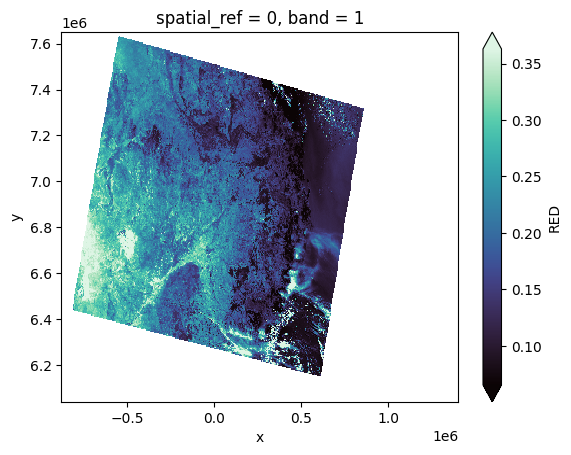

In [11]:
# Plot a subsampled version
slstr_bn_bands[RED][:, ::10, ::10].plot(robust=True, cmap="mako")

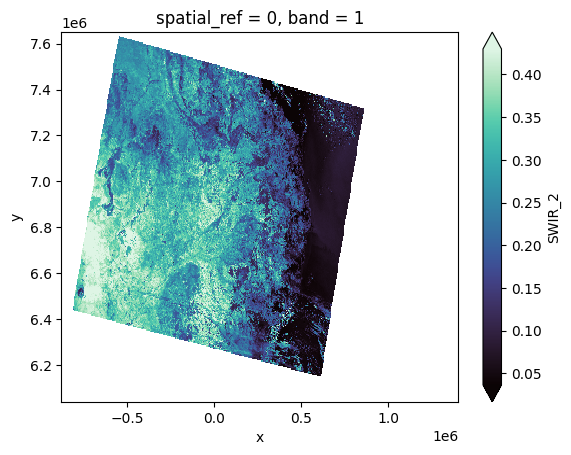

In [12]:
slstr_bn_bands[SWIR_2][:, ::10, ::10].plot(robust=True, cmap="mako")

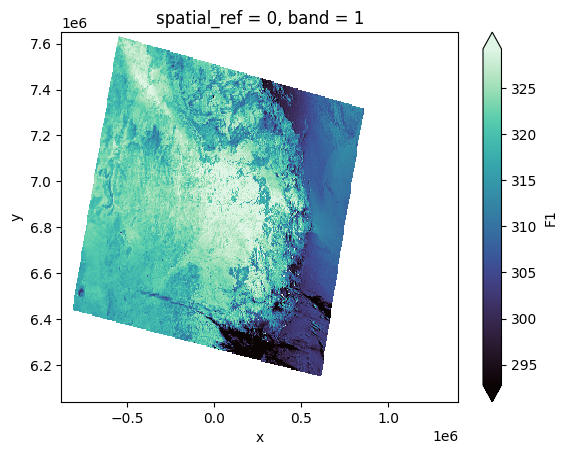

In [13]:
slstr_bn_bands[F1][:, ::10, ::10].plot(robust=True, cmap="mako")

⚠️Sentinel-3 SLSTR radiance is not nominal, so EUMETSAT advises the user to make some radiance adjustments (as stated [here](https://www-cdn.eumetsat.int/files/2021-05/S3.PN-SLSTR-L1.08%20-%20i1r0%20-%20SLSTR%20L1%20PB%202.75-A%20and%201.53-B.pdf))

These coefficients have been added and several sets exist:

In [14]:
# The last one (S3.PN-SLSTR-L1.08, since 18/05/2021) which is also the default one
SlstrRadAdjust.S3_PN_SLSTR_L1_08

<SlstrRadAdjust.S3_PN_SLSTR_L1_08: SlstrRadAdjustTuple(S1_n=0.97, S2_n=0.98, S3_n=0.98, S4_n=1.0, S5_n=1.11, S6_n=1.13, S1_o=0.94, S2_o=0.95, S3_o=0.95, S4_o=1.0, S5_o=1.04, S6_o=1.07)>

In [15]:
# The two older sets given by EUMETSAT are the same
assert SlstrRadAdjust.S3_PN_SLSTR_L1_07 == SlstrRadAdjust.S3_PN_SLSTR_L1_06
SlstrRadAdjust.S3_PN_SLSTR_L1_07


<SlstrRadAdjust.S3_PN_SLSTR_L1_06: SlstrRadAdjustTuple(S1_n=1.0, S2_n=1.0, S3_n=1.0, S4_n=1.0, S5_n=1.12, S6_n=1.15, S1_o=1.0, S2_o=1.0, S3_o=1.0, S4_o=1.0, S5_o=1.2, S6_o=1.26)>

In [16]:
# Moreover, SNAP uses a different set with unknown origin (optional, in S3MPC Calibration)
SlstrRadAdjust.SNAP

<SlstrRadAdjust.SNAP: SlstrRadAdjustTuple(S1_n=1.0, S2_n=1.0, S3_n=1.0, S4_n=1.0, S5_n=1.12, S6_n=1.13, S1_o=1.0, S2_o=1.0, S3_o=1.0, S4_o=1.0, S5_o=1.15, S6_o=1.14)>

In [17]:
# A default set also exists, with every coefficient set to 1.0
SlstrRadAdjust.NONE

<SlstrRadAdjust.NONE: SlstrRadAdjustTuple(S1_n=1.0, S2_n=1.0, S3_n=1.0, S4_n=1.0, S5_n=1.0, S6_n=1.0, S1_o=1.0, S2_o=1.0, S3_o=1.0, S4_o=1.0, S5_o=1.0, S6_o=1.0)>

2025-12-23 10:51:54,694 - [DEBUG] - Loading bands ['RED']
2025-12-23 10:51:54,860 - [DEBUG] - Converting RED to reflectance
2025-12-23 10:51:58,912 - [DEBUG] - Geocoding RED
2025-12-23 10:52:03,512 - [DEBUG] - Read RED
2025-12-23 10:52:03,530 - [DEBUG] - Manage nodata for band RED
2025-12-23 10:52:03,533 - [DEBUG] - Converting RED to reflectance (if needed)
2025-12-23 10:52:03,533 - [DEBUG] - Clip the reflectance array to 0 as minimum value (in some cases, reflectance can have higher value than 1)


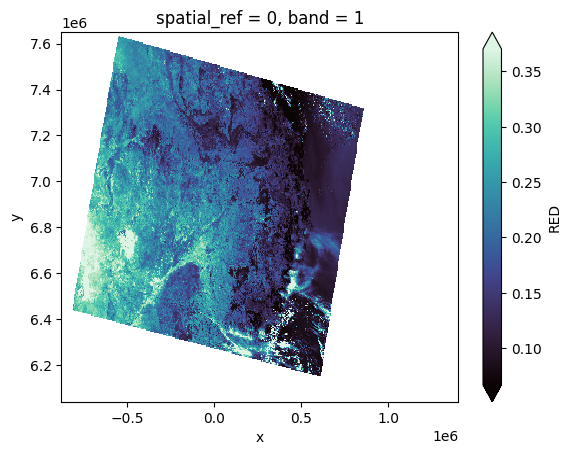

In [18]:
# You can use your own set by creating one.
# All the coefficients are set to 1.0 by default, so just modify the one you want
# The band keywords are {true_name}_{view_letter}
# RED is S2
user_set = SlstrRadAdjustTuple(S1_n=1.15, S2_o=1.12)

# However please bear in mind that if you want to reload the same band with a different adjustment, 
# you have to remove the temporary process folder or the previous band will be reloaded.
slstr_prod.clean_tmp()

# To apply these sets when loading a band, just add the keyword when loading it
red_pn_08 = slstr_bn_bands[RED]
slstr_red_bn = slstr_prod.load(
    RED,
    **{
        SLSTR_VIEW: SlstrView.NADIR,
        SLSTR_STRIPE: SlstrStripe.B,
        SLSTR_RAD_ADJUST: user_set
    }
)
red_user = slstr_red_bn[RED]
red_user[:, ::10, ::10].plot(robust=True, cmap="mako")

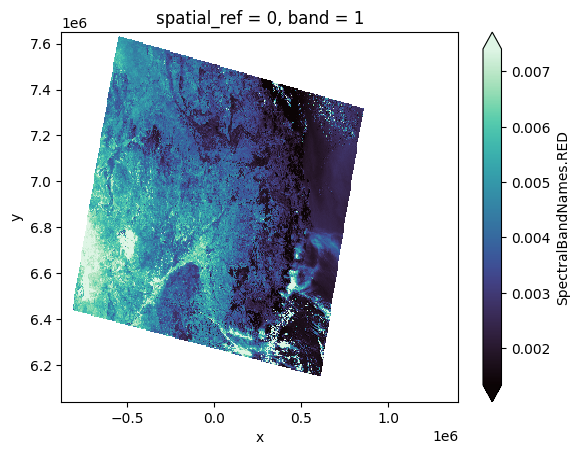

In [19]:
# We may need to collocate the bands if we want to work on two sets loaded apart
# Indeed, in EOReader, the bands are collocated when loaded together

# For example, if we wanted to work on the SWIR or F1 band, 
# as we first loaded them with the RED, they are collocated to this band (the first one) 
# Yet, their geodetic grid are different from the RED one (in and bn are slightly different than the an)
# So if we load on a second time only the SWIR or the F1 band, their are chances that the geocoding might be a little different
# The it is best to collocate the two bands just to be sure they will always match (and have the same size)

# To do so you could do:
from sertit import rasters

red_user = rasters.collocate(red_pn_08, other=red_user)

# Here, it is useless as we work on the master band
abs(red_pn_08 - red_user)[:, ::10, ::10].plot(robust=True, cmap="mako")